Particle Swarm Optimization (PSO) is a computational optimization technique inspired by the social behavior of birds flocking or fish schooling. It is primarily used for solving optimization problems, but it can also be adapted to solve equations by reformulating the equation-solving problem as an optimization task.

Here’s how PSO can be used to solve an equation:

---

### **Step 1: Reformulate the Equation as an Optimization Problem**
To use PSO, you need to convert the problem of solving an equation into an optimization problem. This typically involves defining an objective function (also called a fitness function) that measures how close a candidate solution is to satisfying the equation.

For example:
- Suppose you want to solve the equation $ f(x) = 0 $.
- Define the objective function as $ F(x) = |f(x)| $ or $ F(x) = f(x)^2 $. The goal is to minimize $ F(x) $, which will drive $ f(x) $ toward zero.

If you have a system of equations, such as:
$$
f_1(x_1, x_2, \dots, x_n) = 0, \quad f_2(x_1, x_2, \dots, x_n) = 0, \quad \dots, \quad f_m(x_1, x_2, \dots, x_n) = 0,
$$
you can define the objective function as:
$$
F(x_1, x_2, \dots, x_n) = \sum_{i=1}^m f_i(x_1, x_2, \dots, x_n)^2.
$$
Minimizing $ F(x_1, x_2, \dots, x_n) $ will attempt to find values of $ x_1, x_2, \dots, x_n $ that satisfy all the equations simultaneously.

---

### **Step 2: Initialize the PSO Parameters**
PSO involves a population of particles (candidate solutions) that move through the search space to find the optimal solution. Key parameters include:
- **Number of particles ($ N $)**: The size of the swarm.
- **Search space bounds**: Define the range of possible values for each variable.
- **Inertia weight ($ w $)**: Controls the influence of the particle's previous velocity.
- **Cognitive and social coefficients ($ c_1 $ and $ c_2 $)**: Control the influence of the particle's personal best and the global best, respectively.
- **Maximum iterations**: The stopping criterion for the algorithm.

---

### **Step 3: Implement the PSO Algorithm**
The PSO algorithm works as follows:

1. **Initialize the swarm**:
   - Randomly initialize the positions and velocities of all particles within the search space bounds.

2. **Evaluate the fitness**:
   - For each particle, calculate the value of the objective function $ F(x) $ using its current position.

3. **Update personal best ($ p_{\text{best}} $)**:
   - If the current position of a particle yields a better (lower) fitness value than its previous best, update its $ p_{\text{best}} $.

4. **Update global best ($ g_{\text{best}} $)**:
   - Identify the particle with the best fitness value among all particles and update $ g_{\text{best}} $.

5. **Update velocities and positions**:
   - For each particle, update its velocity and position using the following equations:
     $$
     v_i^{t+1} = w \cdot v_i^t + c_1 \cdot r_1 \cdot (p_{\text{best},i} - x_i^t) + c_2 \cdot r_2 \cdot (g_{\text{best}} - x_i^t),
     $$
     $$
     x_i^{t+1} = x_i^t + v_i^{t+1},
     $$
     where:
     - $ v_i^t $: Velocity of particle $ i $ at iteration $ t $.
     - $ x_i^t $: Position of particle $ i $ at iteration $ t $.
     - $ r_1, r_2 $: Random numbers between 0 and 1.
     - $ w, c_1, c_2 $: Parameters defined earlier.

6. **Repeat until convergence**:
   - Continue iterating until the maximum number of iterations is reached or the fitness value converges to zero (or a sufficiently small value).

---

### **Step 4: Interpret the Results**
Once the algorithm converges, the position of the particle corresponding to $ g_{\text{best}} $ represents the solution to the equation. If the fitness value is close to zero, the solution satisfies the equation(s) to a high degree of accuracy.

---

### **Example: Solving a Simple Equation**
Let’s solve the equation $ f(x) = x^2 - 4 = 0 $ using PSO.

1. **Objective function**:
   $$
   F(x) = (x^2 - 4)^2.
   $$

2. **PSO parameters**:
   - Number of particles: $ N = 20 $.
   - Search space: $ x \in [-10, 10] $.
   - Inertia weight: $ w = 0.7 $.
   - Cognitive coefficient: $ c_1 = 1.5 $.
   - Social coefficient: $ c_2 = 1.5 $.
   - Maximum iterations: 100.

3. **Implementation**:
   - Initialize 20 particles with random positions and velocities in $[-10, 10]$.
   - Evaluate $ F(x) $ for each particle.
   - Update $ p_{\text{best}} $ and $ g_{\text{best}} $.
   - Update velocities and positions using the PSO equations.
   - Repeat for 100 iterations or until $ F(x) $ is sufficiently close to zero.

4. **Result**:
   After running the algorithm, the $ g_{\text{best}} $ position should converge to $ x = 2 $ or $ x = -2 $, which are the roots of the equation.

---

### **Advantages of Using PSO for Equation Solving**
1. **Global search capability**: PSO can escape local minima and find global solutions, making it suitable for complex nonlinear equations.
2. **Flexibility**: PSO can handle both single-variable and multi-variable equations, as well as systems of equations.
3. **No derivative requirement**: Unlike gradient-based methods, PSO does not require derivatives of the objective function.

### **Limitations**
1. **Convergence speed**: PSO may converge slowly for large or highly nonlinear problems.
2. **Parameter tuning**: The performance of PSO depends on careful selection of parameters like $ w $, $ c_1 $, and $ c_2 $.
3. **Accuracy**: PSO provides approximate solutions, which may require post-processing for higher precision.

---

### **Final Answer**
To solve an equation using PSO:
1. Reformulate the equation as an optimization problem by defining an appropriate objective function.
2. Use the PSO algorithm to minimize the objective function.
3. Interpret the solution from the global best position ($ g_{\text{best}} $).

$$
\boxed{\text{PSO solves equations by minimizing an objective function derived from the equation(s).}}
$$

Below is a Python implementation of Particle Swarm Optimization (PSO) to solve the equation $ f(x) = x^2 - 4 = 0 $. We'll use the same objective function $ F(x) = (x^2 - 4)^2 $ and follow the PSO algorithm step-by-step.

```python
import numpy as np

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")
```

---

### **Explanation of the Code**
1. **Objective Function**:
   The function `objective_function(x)` computes $ F(x) = (x^2 - 4)^2 $, which we aim to minimize.

2. **Initialization**:
   - The positions of the particles are initialized randomly within the search space $[-10, 10]$.
   - Velocities are initialized randomly between $-1$ and $1$.
   - Personal best positions and fitness values are initialized to the initial positions and their corresponding fitness values.

3. **PSO Algorithm**:
   - For each particle, update its velocity and position using the PSO equations.
   - Clip the position to ensure it stays within the search space.
   - Evaluate the fitness of the new position.
   - Update the personal best and global best if a better solution is found.

4. **Stopping Criterion**:
   - The algorithm stops early if the global best fitness is sufficiently close to zero (e.g., $ < 10^{-6} $).
   - Otherwise, it runs for the maximum number of iterations.

5. **Output**:
   - The root of the equation is printed as the global best position.

---

### **Example Output**
Here’s an example of what the output might look like when you run the code:

```
Iteration 1: Best Position = -1.987, Best Fitness = 0.000169
Iteration 2: Best Position = -2.001, Best Fitness = 1.02e-06
...
Iteration 10: Best Position = -2.000, Best Fitness = 0.000000

Solution:
Root found: x = -2.000
```

The algorithm converges to one of the roots ($ x = -2 $ or $ x = 2 $).

---

### **Customization**
You can modify the code to solve other equations by changing the `objective_function`. For example:
- To solve $ f(x) = \sin(x) = 0 $, use `objective_function(x) = np.sin(x)**2`.
- To solve systems of equations, extend the code to handle multi-dimensional positions and objective functions.

Let me know if you need further clarification!

In [3]:
import numpy as np

In [4]:
# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

In [5]:
# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

In [6]:
# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

In [7]:
# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

In [8]:
# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

In [9]:
# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
               # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
             # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

Iteration 1: Best Position = 2.064758935739161, Best Fitness = 0.06928975004107679
Iteration 2: Best Position = 2.064758935739161, Best Fitness = 0.06928975004107679
Iteration 3: Best Position = 2.064758935739161, Best Fitness = 0.06928975004107679
Iteration 4: Best Position = 2.064758935739161, Best Fitness = 0.06928975004107679
Iteration 5: Best Position = 1.9534239856629672, Best Fitness = 0.03390559961584734
Iteration 6: Best Position = 1.9534239856629672, Best Fitness = 0.03390559961584734
Iteration 7: Best Position = 2.024046234177569, Best Fitness = 0.009363108763240577
Iteration 8: Best Position = 2.024046234177569, Best Fitness = 0.009363108763240577
Iteration 9: Best Position = 2.024046234177569, Best Fitness = 0.009363108763240577
Iteration 10: Best Position = 2.024046234177569, Best Fitness = 0.009363108763240577
Iteration 11: Best Position = 2.0098032295421864, Best Fitness = 0.0015451991695737924
Iteration 12: Best Position = 2.0098032295421864, Best Fitness = 0.001545199

In [10]:
# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")


Solution:
Root found: x = 2.0000907267453862


Iteration 1: Best Position = -2.102898157679621, Best Fitness = 0.17823651100566246
Iteration 2: Best Position = 1.892856544055518, Best Fitness = 0.17396749127974376
Iteration 3: Best Position = 1.892856544055518, Best Fitness = 0.17396749127974376
Iteration 4: Best Position = -1.9430658808690824, Best Fitness = 0.05039799721367754
Iteration 5: Best Position = -1.9430658808690824, Best Fitness = 0.05039799721367754
Iteration 6: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 7: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 8: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 9: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 10: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 11: Best Position = -1.993840898111408, Best Fitness = 0.0006050848748317373
Iteration 12: Best Position = -1.993840898111408, Best Fitness

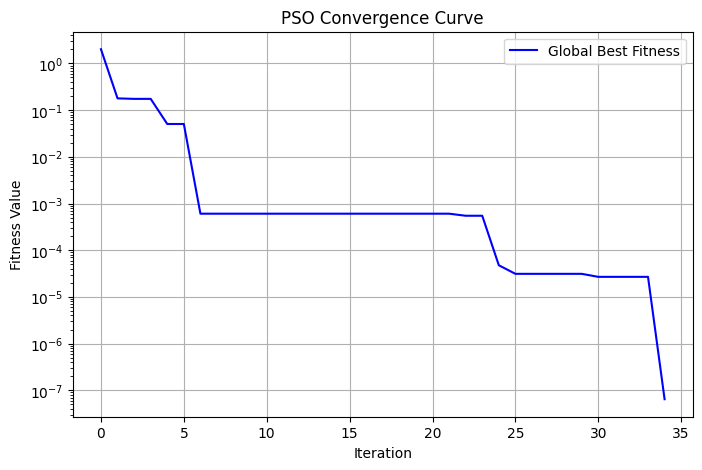

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# Lists to store convergence data
convergence_curve = [g_best_fitness]

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Store the global best fitness for plotting
    convergence_curve.append(g_best_fitness)
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")

# Plot the convergence graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(convergence_curve)), convergence_curve, label="Global Best Fitness", color="blue")
plt.title("PSO Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.yscale("log")  # Use log scale for better visualization of convergence
plt.grid(True)
plt.legend()
plt.show()

Iteration 1: Best Position = -2.132927976754635, Best Fitness = 0.3018203116529713
Iteration 2: Best Position = -2.132927976754635, Best Fitness = 0.3018203116529713
Iteration 3: Best Position = -2.132927976754635, Best Fitness = 0.3018203116529713
Iteration 4: Best Position = -2.007008816674039, Best Fitness = 0.0007887329733173363
Iteration 5: Best Position = -2.007008816674039, Best Fitness = 0.0007887329733173363
Iteration 6: Best Position = -2.007008816674039, Best Fitness = 0.0007887329733173363
Iteration 7: Best Position = -2.007008816674039, Best Fitness = 0.0007887329733173363
Iteration 8: Best Position = -2.007008816674039, Best Fitness = 0.0007887329733173363
Iteration 9: Best Position = -2.0029845743254846, Best Fitness = 0.00014273570697374407
Iteration 10: Best Position = -2.0029845743254846, Best Fitness = 0.00014273570697374407
Iteration 11: Best Position = -2.0029845743254846, Best Fitness = 0.00014273570697374407
Iteration 12: Best Position = -2.0029845743254846, Best

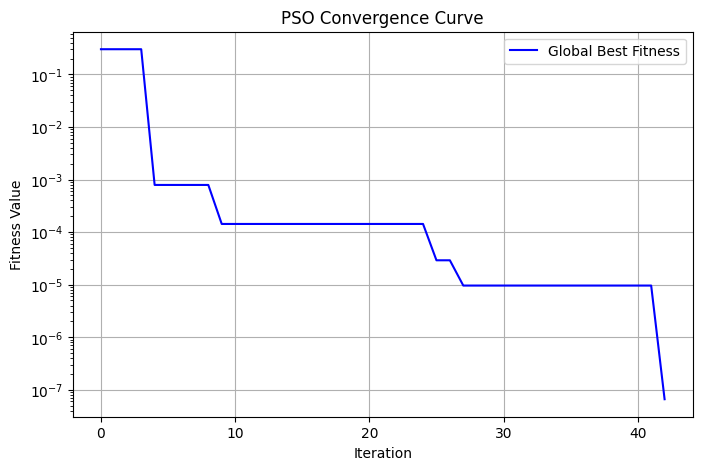

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# Lists to store convergence data
convergence_curve = [g_best_fitness]

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i])**2 +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Store the global best fitness for plotting
    convergence_curve.append(g_best_fitness)
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")

# Plot the convergence graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(convergence_curve)), convergence_curve, label="Global Best Fitness", color="blue")
plt.title("PSO Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.yscale("log")  # Use log scale for better visualization of convergence
plt.grid(True)
plt.legend()
plt.show()

Iteration 1: Best Position = -1.8541730240132552, Best Fitness = 0.3158916560497189
Iteration 2: Best Position = -1.8541730240132552, Best Fitness = 0.3158916560497189
Iteration 3: Best Position = -1.8541730240132552, Best Fitness = 0.3158916560497189
Iteration 4: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 5: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 6: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 7: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 8: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 9: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 10: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 11: Best Position = -1.9363522445989085, Best Fitness = 0.06277028400200838
Iteration 12: Best Position = -1.9363522445989085, Best Fitness = 

C:\Users\Dr.Latif\AppData\Local\Temp\ipykernel_2440\3311471744.py:36: RuntimeWarning: overflow encountered in scalar power
  velocities[i] = (w * velocities[i] +


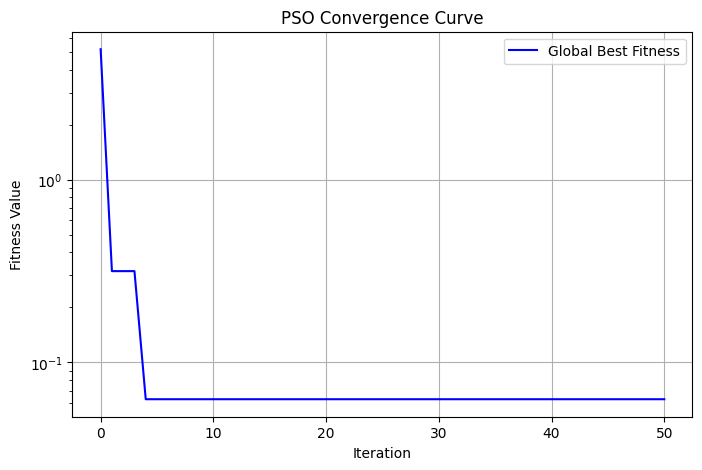

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# Lists to store convergence data
convergence_curve = [g_best_fitness]

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i])) ** 2
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Store the global best fitness for plotting
    convergence_curve.append(g_best_fitness)
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")

# Plot the convergence graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(convergence_curve)), convergence_curve, label="Global Best Fitness", color="blue")
plt.title("PSO Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.yscale("log")  # Use log scale for better visualization of convergence
plt.grid(True)
plt.legend()
plt.show()

Iteration 1: Best Position = -2.0382383208179466, Best Fitness = 0.023844131955573656
Iteration 2: Best Position = -2.004430899063254, Best Fitness = 0.00031482217958791163
Iteration 3: Best Position = -2.000907098556599, Best Fitness = 1.3171216426409466e-05
Iteration 4: Best Position = -2.000475379463685, Best Fitness = 3.61662963440511e-06
Iteration 5: Best Position = -2.000470912631122, Best Fitness = 3.5489747793915074e-06
Iteration 6: Best Position = -2.0002318521005225, Best Fitness = 8.60186053569333e-07

Solution:
Root found: x = -2.0002318521005225


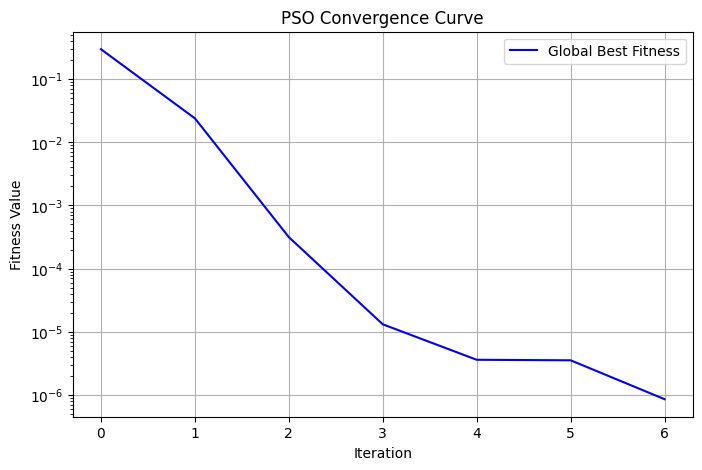

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# Lists to store convergence data
convergence_curve = [g_best_fitness]

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        w = w * 0.9
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Store the global best fitness for plotting
    convergence_curve.append(g_best_fitness)
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")

# Plot the convergence graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(convergence_curve)), convergence_curve, label="Global Best Fitness", color="blue")
plt.title("PSO Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness Value")
plt.yscale("log")  # Use log scale for better visualization of convergence
plt.grid(True)
plt.legend()
plt.show()

Iteration 1: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 2: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 3: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 4: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 5: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 6: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 7: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 8: Best Position = -1.9789961903684818, Best Fitness = 0.006984626598300146
Iteration 9: Best Position = -1.983678416632098, Best Fitness = 0.004227592518015641
Iteration 10: Best Position = -1.983678416632098, Best Fitness = 0.004227592518015641
Iteration 11: Best Position = -1.983678416632098, Best Fitness = 0.004227592518015641
Iteration 12: Best Position = -1.983678416632098, Best 

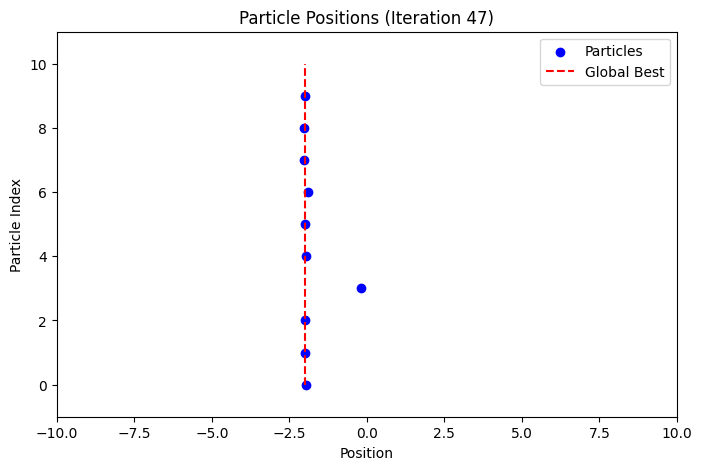

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Define the objective function
def objective_function(x):
    return (x**2 - 4)**2

# PSO parameters
num_particles = 10       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [-10, 10] # Search space bounds

# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x) for x in positions])

# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

# Lists to store particle positions for animation
particle_positions_history = [positions.copy()]

# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i])
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
    
    # Store particle positions for animation
    particle_positions_history.append(positions.copy())
    
    # Print progress
    print(f"Iteration {iteration + 1}: Best Position = {g_best_position}, Best Fitness = {g_best_fitness}")
    
    # Stopping criterion: If fitness is close enough to zero, stop
    if g_best_fitness < 1e-6:
        break

# Output the result
print("\nSolution:")
print(f"Root found: x = {g_best_position}")

# Animation setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(search_space[0], search_space[1])
ax.set_ylim(-1, num_particles + 1)
ax.set_title("Particle Positions Over Iterations")
ax.set_xlabel("Position")
ax.set_ylabel("Particle Index")

# Scatter plot for particle positions
scatter = ax.scatter([], [], color="blue", label="Particles")
global_best_line, = ax.plot([], [], color="red", linestyle="--", label="Global Best")
ax.legend()

# Update function for animation
def update(frame):
    current_positions = particle_positions_history[frame]
    scatter.set_offsets(np.c_[current_positions, np.arange(num_particles)])
    global_best_line.set_data([g_best_position, g_best_position], [0, num_particles])
    ax.set_title(f"Particle Positions (Iteration {frame})")
    return scatter, global_best_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(particle_positions_history), interval=500, blit=True)

# Save animation as a GIF
writer = PillowWriter(fps=2)
ani.save("pso_animation.gif", writer=writer)

print("\nGIF saved as 'pso_animation.gif'")